# Car Machine Prediction Yearly

In [4]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Data Extraction

In [5]:
#import data
car = pd.read_csv('cars.csv')

In [6]:
car.shape

(261, 8)

In [7]:
car.head()

mpg   cylinders  cubicinches   hp  weightlbs   time-to-60   Year     Brand
0  14.0           8          350  165       4209           12   1972       US.
1  31.9           4           89   71       1925           14   1980   Europe.
2  17.0           8          302  140       3449           11   1971       US.
3  15.0           8          400  150       3761           10   1971       US.
4  30.5           4           98   63       2051           17   1978       US.

In [8]:
car.describe()

mpg   cylinders          hp   time-to-60         Year
count  261.000000  261.000000  261.000000   261.000000   261.000000
mean    23.144828    5.590038  106.360153    15.547893  1976.819923
std      7.823570    1.733310   40.499959     2.910625     3.637696
min     10.000000    3.000000   46.000000     8.000000  1971.000000
25%     16.900000    4.000000   75.000000    14.000000  1974.000000
50%     22.000000    6.000000   95.000000    16.000000  1977.000000
75%     28.800000    8.000000  138.000000    17.000000  1980.000000
max     46.600000    8.000000  230.000000    25.000000  1983.000000

In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    Year         261 non-null    int64  
 7    Brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


## Transform Data

In [10]:
car['mpg'] = car['mpg'].astype(int)
car.head()

mpg   cylinders  cubicinches   hp  weightlbs   time-to-60   Year     Brand
0   14           8          350  165       4209           12   1972       US.
1   31           4           89   71       1925           14   1980   Europe.
2   17           8          302  140       3449           11   1971       US.
3   15           8          400  150       3761           10   1971       US.
4   30           4           98   63       2051           17   1978       US.

## Decision Tree Model

In [11]:
x = [[350,165,1972],
     [89,71,1980],
     [302,140,1971]]
y = ['US', 'Japan', 'Europe']
feature = ['cubicinches', 'hp', 'Year']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=2)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[350, 165, 1972]]
['US']
[[302, 140, 1971], [89, 71, 1980]]
['Europe', 'Japan']


In [13]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(x, y)

In [14]:
pred = dtc.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(pred)
print(accuracy)

['Europe' 'Japan']
1.0


In [16]:
print(confusion_matrix(y_test, pred))

[[1 0]
 [0 1]]


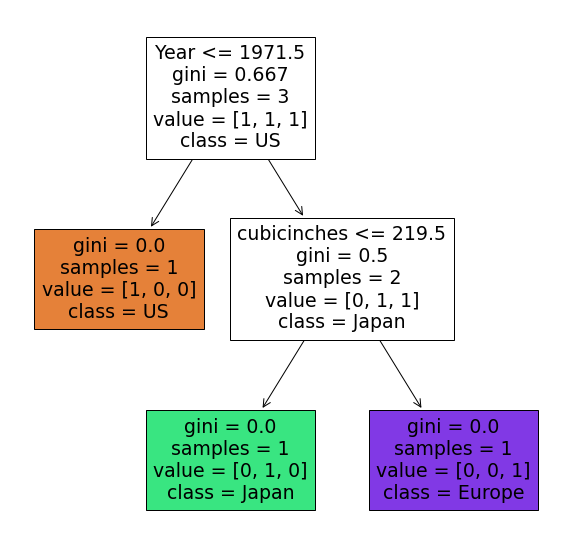

In [17]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dtc, 
                   feature_names=feature,  
                   class_names=y,
                   filled=True)

## Visualization

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':' cylinders'}>],
       [<AxesSubplot:title={'center':' hp'}>,
        <AxesSubplot:title={'center':' time-to-60'}>],
       [<AxesSubplot:title={'center':' Year'}>, <AxesSubplot:>]],
      dtype=object)

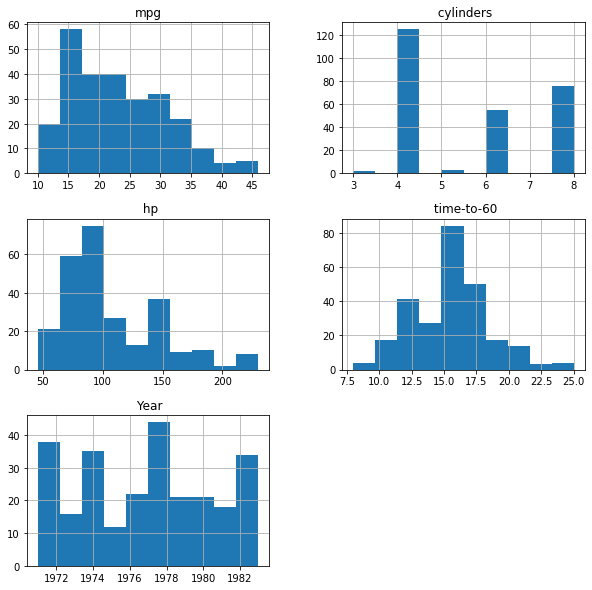

In [18]:
#histogram
car.hist(figsize=(10,10))

<AxesSubplot:>

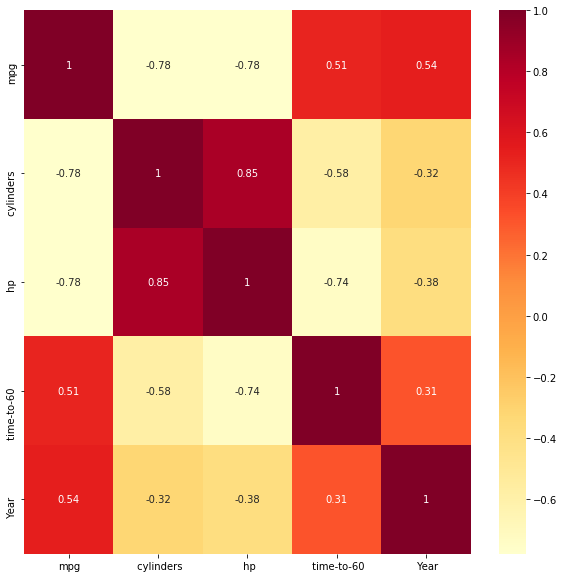

In [19]:
#heatmap correlation
plt.figure(figsize=(10,10))
sns.heatmap(car.corr(), annot=True, cmap="YlOrRd")

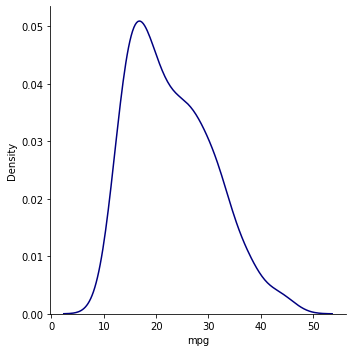

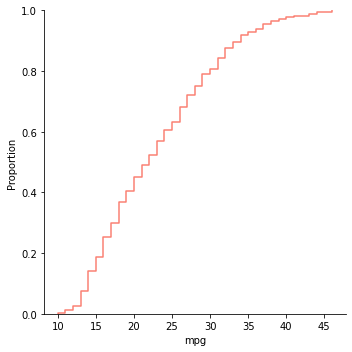

In [20]:
#print('displot of density and proportion mpg of Car Machine')
sns.displot(car, x='mpg', kind='kde', color='navy')
sns.displot(car, x='mpg', kind='ecdf', color='salmon')